In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
air_data = pd.read_csv('Resources/air_flight_data.csv')
air_data.head()


,Unnamed: 0,2016-2017,2017-2018,2018-2019,2019-2020
0,January,3.0,2.9,4.0,5.6
1,February,-0.2,5.7,3.0,6.7
2,March,3.4,4.6,5.1,-51.3
3,April*,4.5,4.8,3.8,-96.1
4,May,3.0,4.9,5.2,NaN


In [2]:
covid_df = pd.read_csv('Resources/covid.csv')
covid_df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


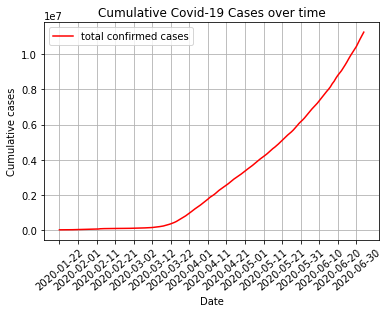

In [3]:
covid_cases= covid_df["Confirmed"]
#fig= plt.figure(figsize=(15,15))
x_axis1=covid_df["Date"]
y_axis1=covid_cases
line1 = plt.plot(x_axis1, y_axis1, color="red", label="total confirmed cases")

plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('Cumulative Covid-19 Cases over time')

plt.xticks(np.arange(0, 170, step=10))
plt.xticks(rotation=40) 

plt.grid()
plt.show()


In [4]:
total_cases=covid_df["Confirmed"].max()
total_cases

11266568

In [5]:
total_deaths=covid_df["Deaths"].max()
total_deaths

530738

In [6]:
death_rate=(total_deaths/total_cases)*100
death_rate

4.710733561453674

## Covid-19 Data analysis

In [7]:
#read in CSV file
covid_by_country_df = pd.read_csv('Resources/covid_by_Country.csv')
covid_by_country_df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,34740,1048,21454,12238,285,36,200,3.02,61.76,4.88,33384,1356,4.06,Eastern Mediterranean
1,Albania,3667,97,2062,1508,96,2,48,2.65,56.23,4.70,3038,629,20.70,Europe
2,Algeria,20216,1028,14295,4893,527,10,276,5.09,70.71,7.19,16879,3337,19.77,Africa
3,Andorra,861,52,803,6,3,0,0,6.04,93.26,6.48,855,6,0.70,Europe
4,Angola,541,26,118,397,16,0,0,4.81,21.81,22.03,386,155,40.16,Africa


In [8]:
#sort by number of cases
sorted_covid_world_df = covid_by_country_df.sort_values(by=['Confirmed'], ascending=False)
sorted_covid_world_df.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,3431574,136466,1049098,2246010,67417,900,17159,3.98,30.57,13.01,2996098,435476,14.53,Americas
23,Brazil,1926824,74133,1323425,529266,41857,1300,32174,3.85,68.68,5.60,1668589,258235,15.48,Americas
79,India,936181,24309,592032,319840,29429,582,20572,2.60,63.24,4.11,742417,193764,26.10,South-East Asia
138,Russia,738787,11597,511958,215232,6240,175,8790,1.57,69.30,2.27,693215,45572,6.57,Europe
132,Peru,333867,12229,223261,98377,3744,175,2253,3.66,66.87,5.48,309278,24589,7.95,Americas
35,Chile,319493,7069,289220,23204,1836,45,2664,2.21,90.52,2.44,301019,18474,6.14,Americas
111,Mexico,311486,36327,245830,29329,7051,836,5729,11.66,78.92,14.78,268008,43478,16.22,Americas
154,South Africa,298292,4346,146279,147667,10496,174,8038,1.46,49.04,2.97,215855,82437,38.19,Africa
177,United Kingdom,292931,45053,1385,246493,1240,138,1,15.38,0.47,3252.92,287874,5057,1.76,Europe
81,Iran,262173,13211,225270,23692,2521,179,2731,5.04,85.92,5.86,245688,16485,6.71,Eastern Mediterranean


In [9]:
# US_df=covid_by_couuntry_df.loc[covid_by_couuntry_df["Country/Region"]=="US"]
# US_cases= US_df["Confirmed"]
# x_axis1=guinea_df["Date"]
# y_axis1=guinea_cases
# fig= plt.figure(figsize=(15,15))
# plt.bar(x_axis1, y_axis1, color="darkturquoise", label="Guinea"
                
                

In [10]:
#bar chart top 20 world

In [11]:
covid_by_country_df.rename(columns={'WHO Region': 'WHO_Region'}, inplace=True)
covid_by_country_df
covid_by_country_df.WHO_Region.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [21]:
#stats by region
americas_df=covid_by_country_df.loc[covid_by_country_df["WHO_Region"]=="Americas"]
# americas_df.head()
top_ten_americas=americas_df.nlargest(10,'Confirmed')
top_ten_americas

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
173,US,3431574,136466,1049098,2246010,67417,900,17159,3.98,30.57,13.01,2996098,435476,14.53,Americas
23,Brazil,1926824,74133,1323425,529266,41857,1300,32174,3.85,68.68,5.60,1668589,258235,15.48,Americas
132,Peru,333867,12229,223261,98377,3744,175,2253,3.66,66.87,5.48,309278,24589,7.95,Americas
35,Chile,319493,7069,289220,23204,1836,45,2664,2.21,90.52,2.44,301019,18474,6.14,Americas
111,Mexico,311486,36327,245830,29329,7051,836,5729,11.66,78.92,14.78,268008,43478,16.22,Americas
37,Colombia,154277,5787,65809,82681,3832,153,2358,3.75,42.66,8.79,120281,33996,28.26,Americas
32,Canada,110337,8844,0,101493,366,9,0,8.02,0.00,inf,108010,2327,2.15,Americas
6,Argentina,106910,1968,45467,59475,3645,65,1294,1.84,42.53,4.33,83426,23484,28.15,Americas
51,Ecuador,69570,5130,30484,33956,1111,67,115,7.37,43.82,16.83,63245,6325,10.00,Americas
20,Bolivia,50867,1898,15819,33150,1617,32,525,3.73,31.10,12.00,41545,9322,22.44,Americas


Text(0.5, 1.0, 'Number of confirmed cases Americas')

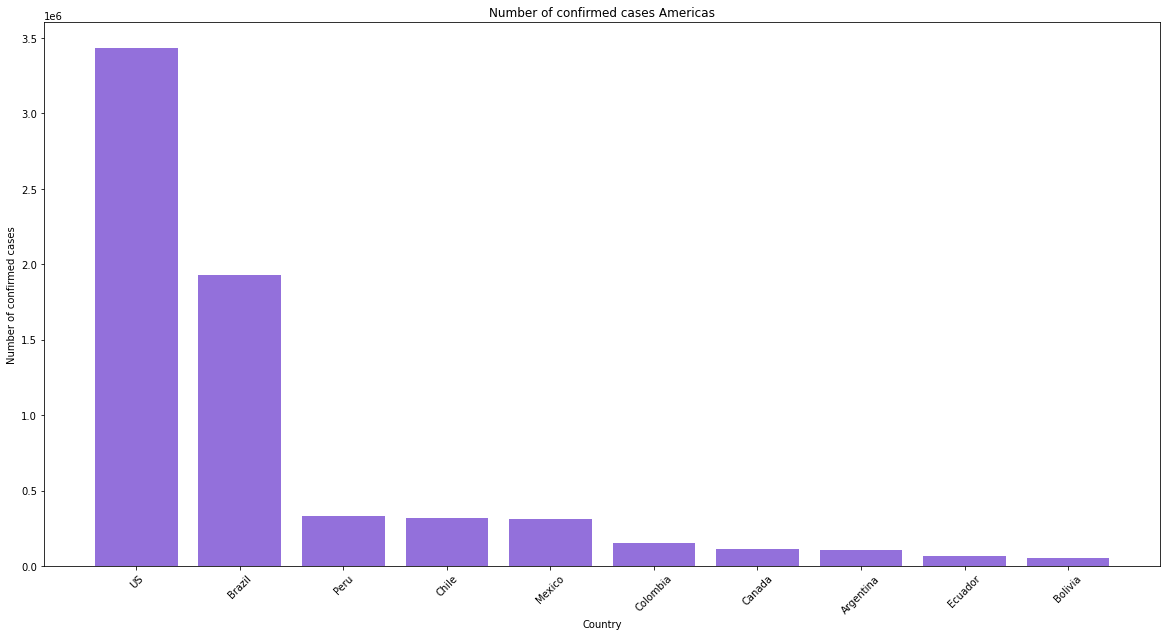

In [30]:
# fig= plt.figure(figsize=(10,10))
# americas_df.plot(kind="bar", color= 'cornflowerblue')
# plt.xlabel("Country/Region")
# plt.xticks(rotation=40)
# plt.ylabel("Number of cases")
# plt.title("Total ebola cases per country")

x_axis= top_ten_americas['Country/Region']
y_axis= top_ten_americas['Confirmed']
fig= plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='mediumpurple', align="center")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of confirmed cases")
plt.title("Number of confirmed cases Americas")

In [14]:
pacific_df=covid_by_country_df.loc[covid_by_country_df["WHO_Region"]=="Western Pacific"]
pacific_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
8,Australia,10487,111,7928,2448,236,3,93,1.06,75.60,1.40,8886,1601,18.02,Western Pacific
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,Western Pacific
30,Cambodia,165,0,133,32,0,0,0,0.00,80.61,0.00,141,24,17.02,Western Pacific
36,China,85226,4642,78190,2394,109,1,59,5.45,91.74,5.94,84917,309,0.36,Western Pacific
59,Fiji,26,0,18,8,0,0,0,0.00,69.23,0.00,21,5,23.81,Western Pacific


In [4]:
covid_by_day = pd.read_csv('Resources/covid_by_day.csv')
covid_by_day.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [11]:
#cdc hospitalization data
covid_hospitalizations = pd.read_csv('Resources/covid_hospitalizations.csv')
covid_hospitalizations.head()

,CATCHMENT,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,Entire Network,COVID-NET,2020.0,2020.0,10.0,0-4 yr,0.0,0.0
1,Entire Network,COVID-NET,2020.0,2020.0,11.0,0-4 yr,0.0,0.0
2,Entire Network,COVID-NET,2020.0,2020.0,12.0,0-4 yr,0.0,0.0
3,Entire Network,COVID-NET,2020.0,2020.0,13.0,0-4 yr,0.4,0.4
4,Entire Network,COVID-NET,2020.0,2020.0,14.0,0-4 yr,0.9,0.6


In [17]:
covid_ICU = pd.read_csv('Resources/ICU_CDC_US.csv')
covid_ICU

,state,collection_date,ICU Beds Occupied Estimated,Count LL,Count UL,Percentage of ICU Beds Occupied Estimated,Percentage LL,Percentage UL
0,AK,2020-03-23,78.052632,64.188477,91.916787,0.333333,0.271758,0.394909
1,AK,2020-03-24,78.052632,64.188477,91.916787,0.333333,0.271758,0.394909
2,AK,2020-03-25,78.052632,64.188477,91.916787,0.333333,0.271758,0.394909
3,AK,2020-03-26,26.017544,16.774774,35.260314,0.111111,0.070061,0.152161
4,AK,2020-03-27,54.256098,42.289312,66.222883,0.272727,0.209054,0.336401
...,...,...,...,...,...,...,...,...
7168,CW,2020-07-10,81124.244363,80904.256717,81344.232009,0.665966,0.662081,0.669851
7169,CW,2020-07-11,80895.529219,80665.843962,81125.214477,0.650485,0.646682,0.654287
7170,CW,2020-07-12,78566.339877,78331.563711,78801.116043,0.631545,0.627737,0.635352
7171,CW,2020-07-13,78443.825132,78216.868849,78670.781414,0.650370,0.646521,0.654219


In [43]:
georgia=covid_ICU.loc[covid_ICU['state']=='GA']
# georgia.drop(georgia.collection_date['2020-03-01','2020-03-02','2020-03-03','2020-03-04','2020-03-05'])
# georgia.drop(georgia.index[[1196,1197,1198,1199,1200]])
# georgia = georgia[georgia.Percentage of ICU Beds Occupied Estimated != 1]
georgia.head()

,state,collection_date,ICU Beds Occupied Estimated,Count LL,Count UL,Percentage of ICU Beds Occupied Estimated,Percentage LL,Percentage UL
1196,GA,2020-03-01,937.254098,937.254098,937.254098,1.0,1.0,1.0
1197,GA,2020-03-02,937.254098,937.254098,937.254098,1.0,1.0,1.0
1198,GA,2020-03-03,937.254098,937.254098,937.254098,1.0,1.0,1.0
1199,GA,2020-03-04,937.254098,937.254098,937.254098,1.0,1.0,1.0
1200,GA,2020-03-05,937.254098,937.254098,937.254098,1.0,1.0,1.0


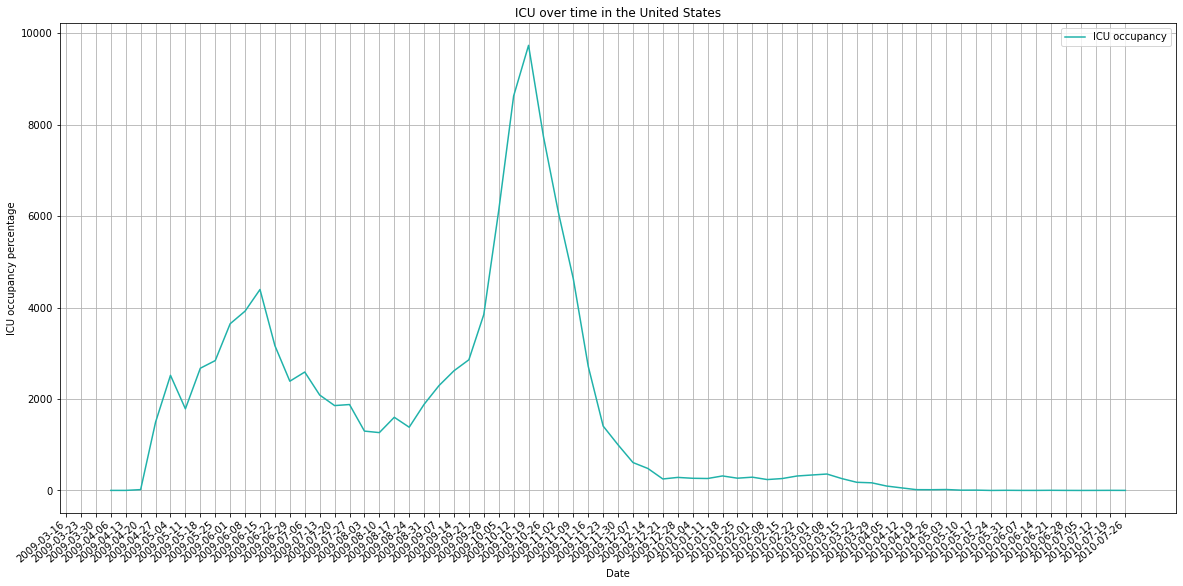

In [49]:
x_axis= georgia['collection_date']
y_axis= georgia['Percentage of ICU Beds Occupied Estimated']
fig= plt.figure(figsize=(20,10))
line1 = plt.plot(x_axis1, y_axis1, color="lightseagreen", label="ICU occupancy")
plt.legend(loc="best")
plt.ylabel('ICU occupancy percentage')
plt.xlabel("Date")
plt.title('ICU over time in the United States')

fig.autofmt_xdate()
# plt.xticks(np.arange(0, 100, step=10))
plt.xticks(rotation=40) 

plt.grid()
plt.show()

In [44]:
new_york=covid_ICU.loc[covid_ICU['state']=='NY']
# new_york.head()

,state,collection_date,ICU Beds Occupied Estimated,Count LL,Count UL,Percentage of ICU Beds Occupied Estimated,Percentage LL,Percentage UL
4634,NY,2020-03-14,2784.159292,2745.112476,2823.206108,0.857143,0.845096,0.869190
4635,NY,2020-03-15,6734.242591,6649.327533,6819.157648,0.711246,0.701955,0.720537
4636,NY,2020-03-16,5846.983878,5774.670452,5919.297304,0.756839,0.747062,0.766616
4637,NY,2020-03-17,5166.009852,5086.668635,5245.351070,0.668693,0.657966,0.679420
4638,NY,2020-03-18,5987.875056,5917.493280,6058.256832,0.775076,0.765560,0.784591


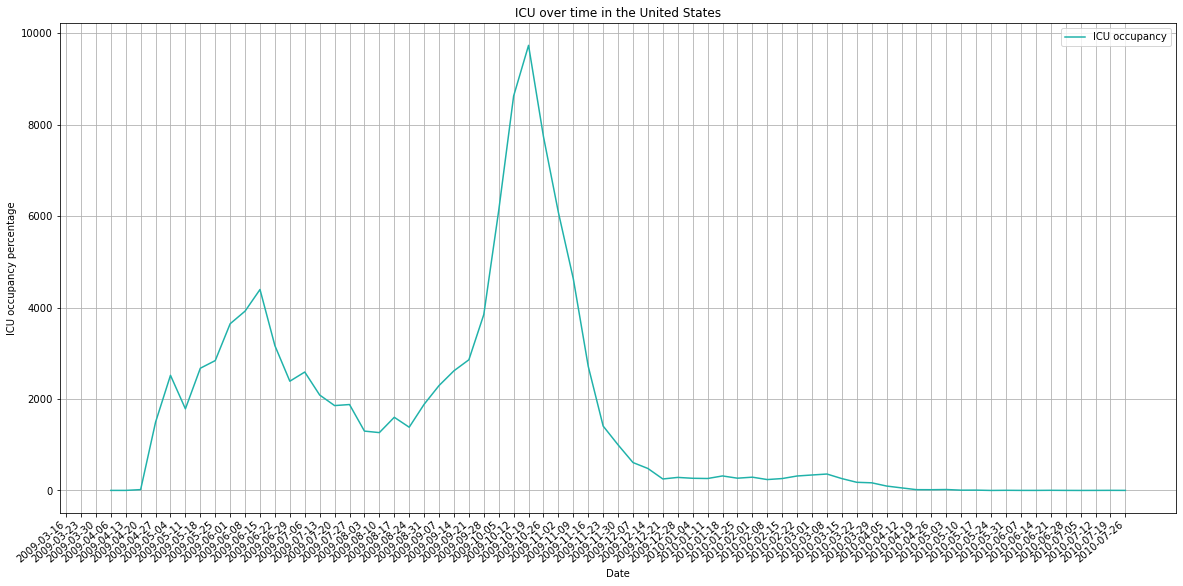

In [48]:
x_axis= new_york['collection_date']
y_axis= new_york['Percentage of ICU Beds Occupied Estimated']
fig= plt.figure(figsize=(20,10))
line1 = plt.plot(x_axis1, y_axis1, color="lightseagreen", label="ICU occupancy")
plt.legend(loc="best")
plt.ylabel('ICU occupancy percentage')
plt.xlabel("Date")
plt.title('ICU over time in the United States')

fig.autofmt_xdate()
# plt.xticks(np.arange(0, 100, step=10))
plt.xticks(rotation=40) 

plt.grid()
plt.show()

In [ ]:
#hospitalizations line graph for each age group through time

H1N1


In [14]:
h1n1_df = pd.read_csv('Resources/H1N1.csv')
h1n1_df

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/
...,...,...,...,...,...
2485,2009-07-06,Venezuela,206,0,https://www.who.int/csr/don/2009_07_06/en/
2486,2009-07-06,Viet Nam,181,0,https://www.who.int/csr/don/2009_07_06/en/
2487,2009-07-06,Virgin Islands,1,0,https://www.who.int/csr/don/2009_07_06/en/
2488,2009-07-06,West Bank and Gaza Strip,60,0,https://www.who.int/csr/don/2009_07_06/en/


In [15]:
#clean data
h1n1_df.drop(columns=['Link'])

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
0,2009-04-24,Mexico,18,0
1,2009-04-24,United States of America,7,0
2,2009-04-26,Mexico,18,0
3,2009-04-26,United States of America,20,0
4,2009-04-27,Canada,6,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [17]:
#h1n1 number of cases curve through time for top 10 countries

In [ ]:
#h1n1 number of deaths curve through time for top 10 countries

In [16]:
total_h1n1_cases= h1n1_df.groupby(["Country"])["Cumulative no. of cases"].max()
total_h1n1_cases
total_h1n1_cases_df = pd.DataFrame(total_h1n1_cases)
total_h1n1_cases_df.reset_index(inplace=True)
total_h1n1_cases_df

,Country,Cumulative no. of cases
0,Algeria,5
1,Antigua and Barbuda,2
2,Argentina,2485
3,Australia,5298
4,Austria,19
...,...,...
143,Venezuela,206
144,Viet Nam,181
145,Virgin Islands,1
146,West Bank and Gaza Strip,60


In [17]:
#top 15 world
top_fifteen_h1n1=total_h1n1_cases_df.nlargest(15,'Cumulative no. of cases')
top_fifteen_h1n1

,Country,Cumulative no. of cases
140,United States of America,33902
82,Mexico,10262
19,Canada,7983
137,United Kingdom,7447
22,Chile,7376
3,Australia,5298
2,Argentina,2485
128,Thailand,2076
23,China,2040
67,Japan,1790


Text(0.5, 1.0, 'Number of confirmed h1n1 cases')

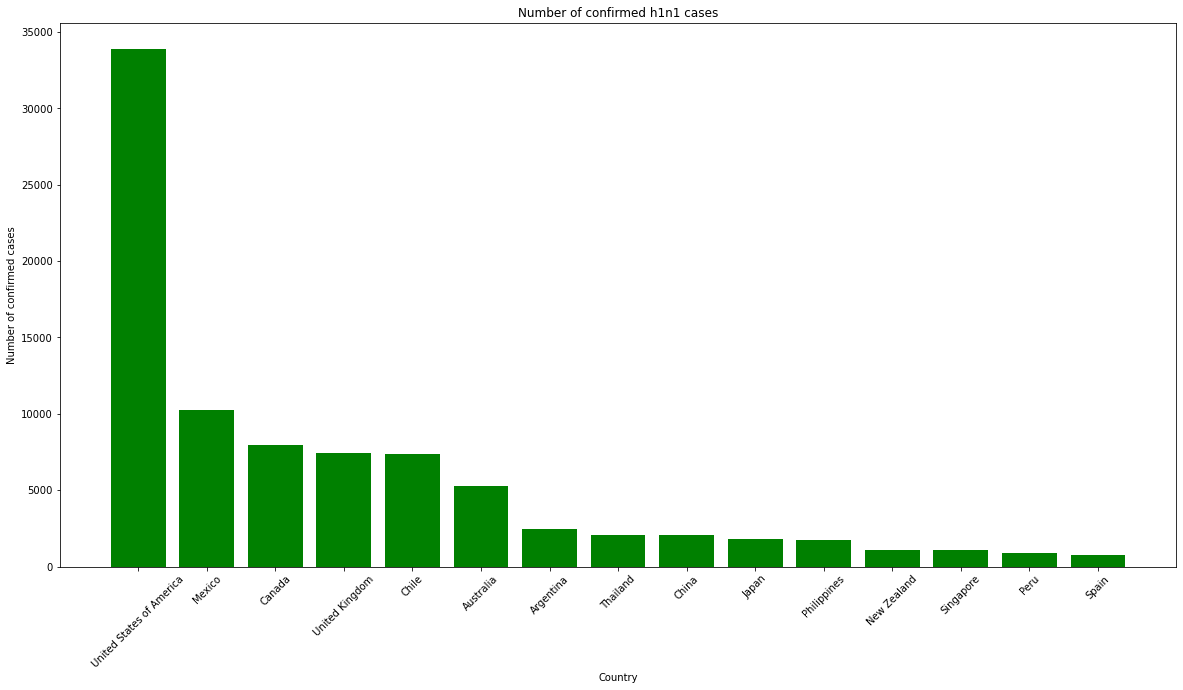

In [29]:
#bar plot yop 15 h1n1
x_axis= top_fifteen_h1n1['Country']
y_axis= top_fifteen_h1n1['Cumulative no. of cases']
fig= plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='green', align="center")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of confirmed cases")
plt.title("Number of confirmed h1n1 cases")

In [ ]:
#line plots
# guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
# guinea_deaths= guinea_df["Cumulative no. of confirmed, probable and suspected deaths"]
# x_axis1=guinea_df["Date"]
# y_axis1=guinea_deaths
# fig= plt.figure(figsize=(20,15))
# line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")

# plt.legend(loc="best")
# plt.ylabel('Cumulative Deaths')
# plt.xlabel("Date")
# plt.title('Cumulative Ebola Deaths over time')
# plt.xticks(np.arange(0, 300, step=20))
# plt.grid()
# plt.xlim(xmin=0)
# plt.xlim(xmax=240)

In [12]:
h1n1_new = pd.read_csv('Resources/h1n1_new.csv')
h1n1_new

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/
...,...,...,...,...,...
2485,2009-07-06,Venezuela,206,0,https://www.who.int/csr/don/2009_07_06/en/
2486,2009-07-06,Viet Nam,181,0,https://www.who.int/csr/don/2009_07_06/en/
2487,2009-07-06,Virgin Islands,1,0,https://www.who.int/csr/don/2009_07_06/en/
2488,2009-07-06,West Bank and Gaza Strip,60,0,https://www.who.int/csr/don/2009_07_06/en/


In [24]:
h1n1 = pd.read_csv('Resources/h1n1_WHO.csv')
h1n1.head()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2009,1,2008-12-29,2009-01-04,6613,6613,111,...,NaN,177,307,NaN,NaN,50,50,357,NaN,Sporadic
1,United States of America,Region of the Americas of WHO,North America,2009,2,2009-01-05,2009-01-11,6980,6980,163,...,NaN,300,490,NaN,NaN,78,78,568,NaN,Sporadic
2,United States of America,Region of the Americas of WHO,North America,2009,3,2009-01-12,2009-01-18,7024,7024,195,...,NaN,421,638,NaN,NaN,104,104,742,NaN,Sporadic
3,United States of America,Region of the Americas of WHO,North America,2009,4,2009-01-19,2009-01-25,7959,7959,353,...,NaN,666,1065,NaN,NaN,189,189,1254,NaN,Local Outbreak
4,United States of America,Region of the Americas of WHO,North America,2009,5,2009-01-26,2009-02-01,9496,9496,555,...,NaN,940,1573,NaN,NaN,380,380,1953,NaN,Regional Outbreak


In [11]:
h1n1.drop(columns=['Week','SPEC_RECEIVED_NB','SPEC_PROCESSED_NB','AH1','AH3','AH5','BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED', 'INF_B','ALL_INF2', 'ALL_INF', 'INF_A'])

,Country,WHOREGION,FLUREGION,Year,SDATE,EDATE,AH1N12009,ANOTSUBTYPED,TITLE
0,United States of America,Region of the Americas of WHO,North America,2009,2008-12-29,2009-01-04,NaN,177,Sporadic
1,United States of America,Region of the Americas of WHO,North America,2009,2009-01-05,2009-01-11,NaN,300,Sporadic
2,United States of America,Region of the Americas of WHO,North America,2009,2009-01-12,2009-01-18,NaN,421,Sporadic
3,United States of America,Region of the Americas of WHO,North America,2009,2009-01-19,2009-01-25,NaN,666,Local Outbreak
4,United States of America,Region of the Americas of WHO,North America,2009,2009-01-26,2009-02-01,NaN,940,Regional Outbreak
...,...,...,...,...,...,...,...,...,...
78,United States of America,Region of the Americas of WHO,North America,2010,2010-06-28,2010-07-04,1.0,4,Sporadic
79,United States of America,Region of the Americas of WHO,North America,2010,2010-07-05,2010-07-11,0.0,1,Sporadic
80,United States of America,Region of the Americas of WHO,North America,2010,2010-07-12,2010-07-18,1.0,1,Sporadic
81,United States of America,Region of the Americas of WHO,North America,2010,2010-07-19,2010-07-25,2.0,4,Sporadic


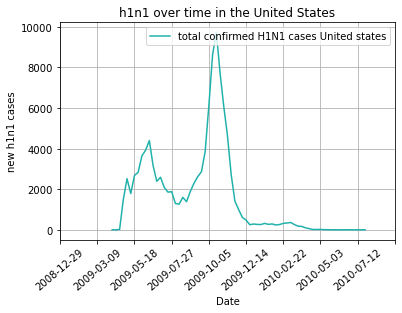

In [16]:
x_axis1=h1n1["SDATE"]
y_axis1=h1n1["AH1N12009"]
line1 = plt.plot(x_axis1, y_axis1, color="lightseagreen", label="total confirmed H1N1 cases United states")

plt.legend(loc="best")
plt.ylabel('new h1n1 cases')
plt.xlabel("Date")
plt.title('h1n1 over time in the United States')

plt.xticks(np.arange(0, 100, step=10))
plt.xticks(rotation=40) 

plt.grid()
plt.show()